# Simple fillable wall calendar

A very minimalist calendar, with Sundays highlighted.

By default, it plots 2025, but it can plot any year, given a target year and 
the weekday of the first day of that year as integer (monday = 1 and so on).

By default, it will plot the days of 2025, differentiating Sundays, 
colouring each Sunday with a random colour from the colourmap you specify.
The default colourmap is matplotlib's 'ocean', but you can use any other, or select your own. 

You can also select 'monochrome', to produce a monochrome calendar, or 'bicolor', 
to produce a calendar with one highlight colour (#1F18C0 (International Klein Blue) by default)

I've made a few examples, saved as .jpgs in the `examples/` folder. 

The default size is US letter, 8.5x11, but you can also scale it up or down. 

If you use it, I hope it's constructive and/or fun.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
rcParams['font.sans-serif'] = ['Gill Sans']
#rcParams['font.monospace'] = ['Menlo']   
rcParams['axes.linewidth'] = 10 # calendar border

## helper functions (square highlighter, random colour retriever)

In [112]:
test = False

def randcol(colormap_name='Spectral'):
    """
    Returns a random color from the specified colormap.

    Parameters:
    colormap_name (str): Name of the Matplotlib colormap (default is 'Spectral').

    Returns:
    tuple: A tuple representing the RGB color (values between 0 and 1).
    """
    # Get the colormap
    cmap = plt.get_cmap(colormap_name)
    # Generate a random value between 0 and 1
    random_value = np.random.rand()
    # Get the color from the colormap
    color = cmap(random_value)
    return color

def squarebox(ax, x1,y1,sq, color = 'r', ns = 3, tlw = 2):
    ofs = 10 
    f = sq/ofs
    rect = patches.Rectangle((x1, y1),sq,sq, edgecolor=color, lw = tlw, alpha = 1, facecolor = 'none') 
    ax.add_patch(rect)
    rect = patches.Rectangle((x1+f, y1+f),f*(ofs-2),f*(ofs-2), edgecolor=color, lw = tlw, alpha = 1, facecolor = 'none') 
    ax.add_patch(rect)

if test: 
    fact = 1
    fig = plt.figure(figsize=(4*fact, 4*fact))
    ax = plt.axes([0, 0, 1, 1])
    
    tc = randcol()
    squarebox(ax, 1,1,1, color = tc, ns = 3)
    ax.set_xlim([0,3])
    ax.set_ylim([0,3])
    plt.show()

## main function

In [113]:

def wallCalendar(yr = 2025, firstDayOfYear = 3, fname = './examples/kalendar2025.jpg', \
                 monochrome = False, bicolor = False, hlightcolor = '#1F18C0', colormap = 'ocean',\
                border = True, scale = 2):

    '''
    a wall calendar. By default, it will plot the days of 2025, differentiating Sundays, 
    colouring each Sunday with a random colour from the colourmap you specify.
    The default colourmap is matplotlib's 'ocean', but you can use any other, or select your own.
    You can also select 'monochrome', to produce a monochrome calendar, or 'bicolor', 
    to produce a calendar with one highlight colour (#1F18C0 (International Klein Blue) by default)

    
    optional arguments:
    
    yr -- int, year to make a calendar for, 2025 as default
    firstDayOfYear -- int, first day of year, 
        Monday = 1, Sunday = 7; 3 (for Wednesday, 2025-01-01, as default)
    fname -- string, path and file name for saving
        ./examples/kalendar2025.jpg' by default
    monochrome -- boolean, False by default
        if True, makes a black and white calendar
    bicolor -- boolean, False by default
        if True, makes a bicolor calendar with a highlight colour you set   
         #1F18C0 (International Klein Blue) by default
    hlightcolor -- string, color of weekend marker
        #1F18C0 (International Klein Blue) by default
    colormap -- colormap to use to generate Sundays, label, and border 
        (if monochrome or bicolor, uses hlightcolor instead)
    scale = multiple of US letter size (8.5x11in) as size of figure
        
    '''

    if monochrome: 
        
        hlightcolor = 'k'
    
    soy = firstDayOfYear
    tcmap = colormap

    #establish leap day
    frog = yr%4 
    if frog == 0:
        dim = np.array([31,29,31,30,31,30,31,31,30,31,30,31])
    else:
        dim = np.array([31,28,31,30,31,30,31,31,30,31,30,31]) 

    ####### measure out the grid, based on US letter size
    fig = plt.figure(figsize=(8.5*scale, 11*scale))
    ax = plt.axes([0, 0, 1, 1])  # Full figure
    # Remove margins (tight layout)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    
    sp = 11/131; ind = 2*sp
    middle = 4.25
    start = 4.25-5.5*sp - 6*3*sp
    
    yind = np.zeros([31]); yind[0] = ind
    for i in range(0,31):    
        if i < 30:
            yind[i+1] = ind+4*sp
        else:
            pass
        ind = ind+4*sp
    yind = np.flip(yind)
    
    ind = start
    xind = np.zeros([12]); xind[0] = start
    for i in range(0,12):
        if i < 11:
            xind[i+1] = ind+4*sp
        ind = ind+4*sp
    
    

    ### add weekday boxes
    doy = soy
    for x in range(0,12):
        ditm = dim[x]-1
        for y in range(0,31):
            if y <= ditm:
                rect = patches.Rectangle((xind[x], yind[y]), sp*3, sp*3, edgecolor='k', \
                                         linestyle = ':', facecolor='w', lw = 0.9, alpha = 1) 
    
                if doy !=7:
    
                    ax.add_patch(rect)
                
                doy = doy+1;
                if doy == 8: doy = 1

    ### add sunday boxes, monochrome or bicolor)
    if (monochrome | bicolor):
        tc = hlightcolor
        doy = soy
        for x in range(0,12):
            ditm = dim[x]-1
            for y in range(0,31):
                if y <= ditm:

                    if doy ==7:                    
                        tc = hlightcolor
                        squarebox(ax, xind[x],yind[y],sp*3, color = tc, ns = 3) 
                    doy = doy+1;
                    if doy == 8: doy = 1

    else:
        doy = soy
        for x in range(0,12):
            ditm = dim[x]-1
            for y in range(0,31):
                if y <= ditm:

                    if doy ==7:                    
                        tc = randcol(tcmap)
                        squarebox(ax, xind[x],yind[y],sp*3, color = tc, ns = 3) 
                    doy = doy+1;
                    if doy == 8: doy = 1

    #### add month titles
    mo = ['1','2','3','4','5','6','7','8','9','10','11','12']
    for i in range(0,12):
        if i < 9:
            ax.text(xind[i]+0.0651,yind[0]+4*sp, mo[i], fontsize = 35, color = 'k')
        else:
            ax.text(xind[i]-0.0101,yind[0]+4*sp, mo[i], fontsize = 35, color = 'k')

    ### add year
    ypos = yind[2]+4*sp-0.05
    if monochrome: 
        tcol = 'k'
    elif bicolor:
        tcol = hlightcolor
    else:
        tcol = randcol(tcmap)
    ax.text(6.55,ypos, yr, fontsize = 120, color = tcol)
    
    ax.set_ylim([0,11])
    ax.set_xlim([0,8.5])
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])

    ax.tick_params(color=tcol, labelcolor=tcol)
    if border:
        for spine in ax.spines.values():
            spine.set_edgecolor(tcol)
    
    plt.savefig(fname, format='jpg', dpi=300, bbox_inches='tight', pad_inches=0.5)
    
    plt.show()

# some examples

## default implementation (ocean colormap)

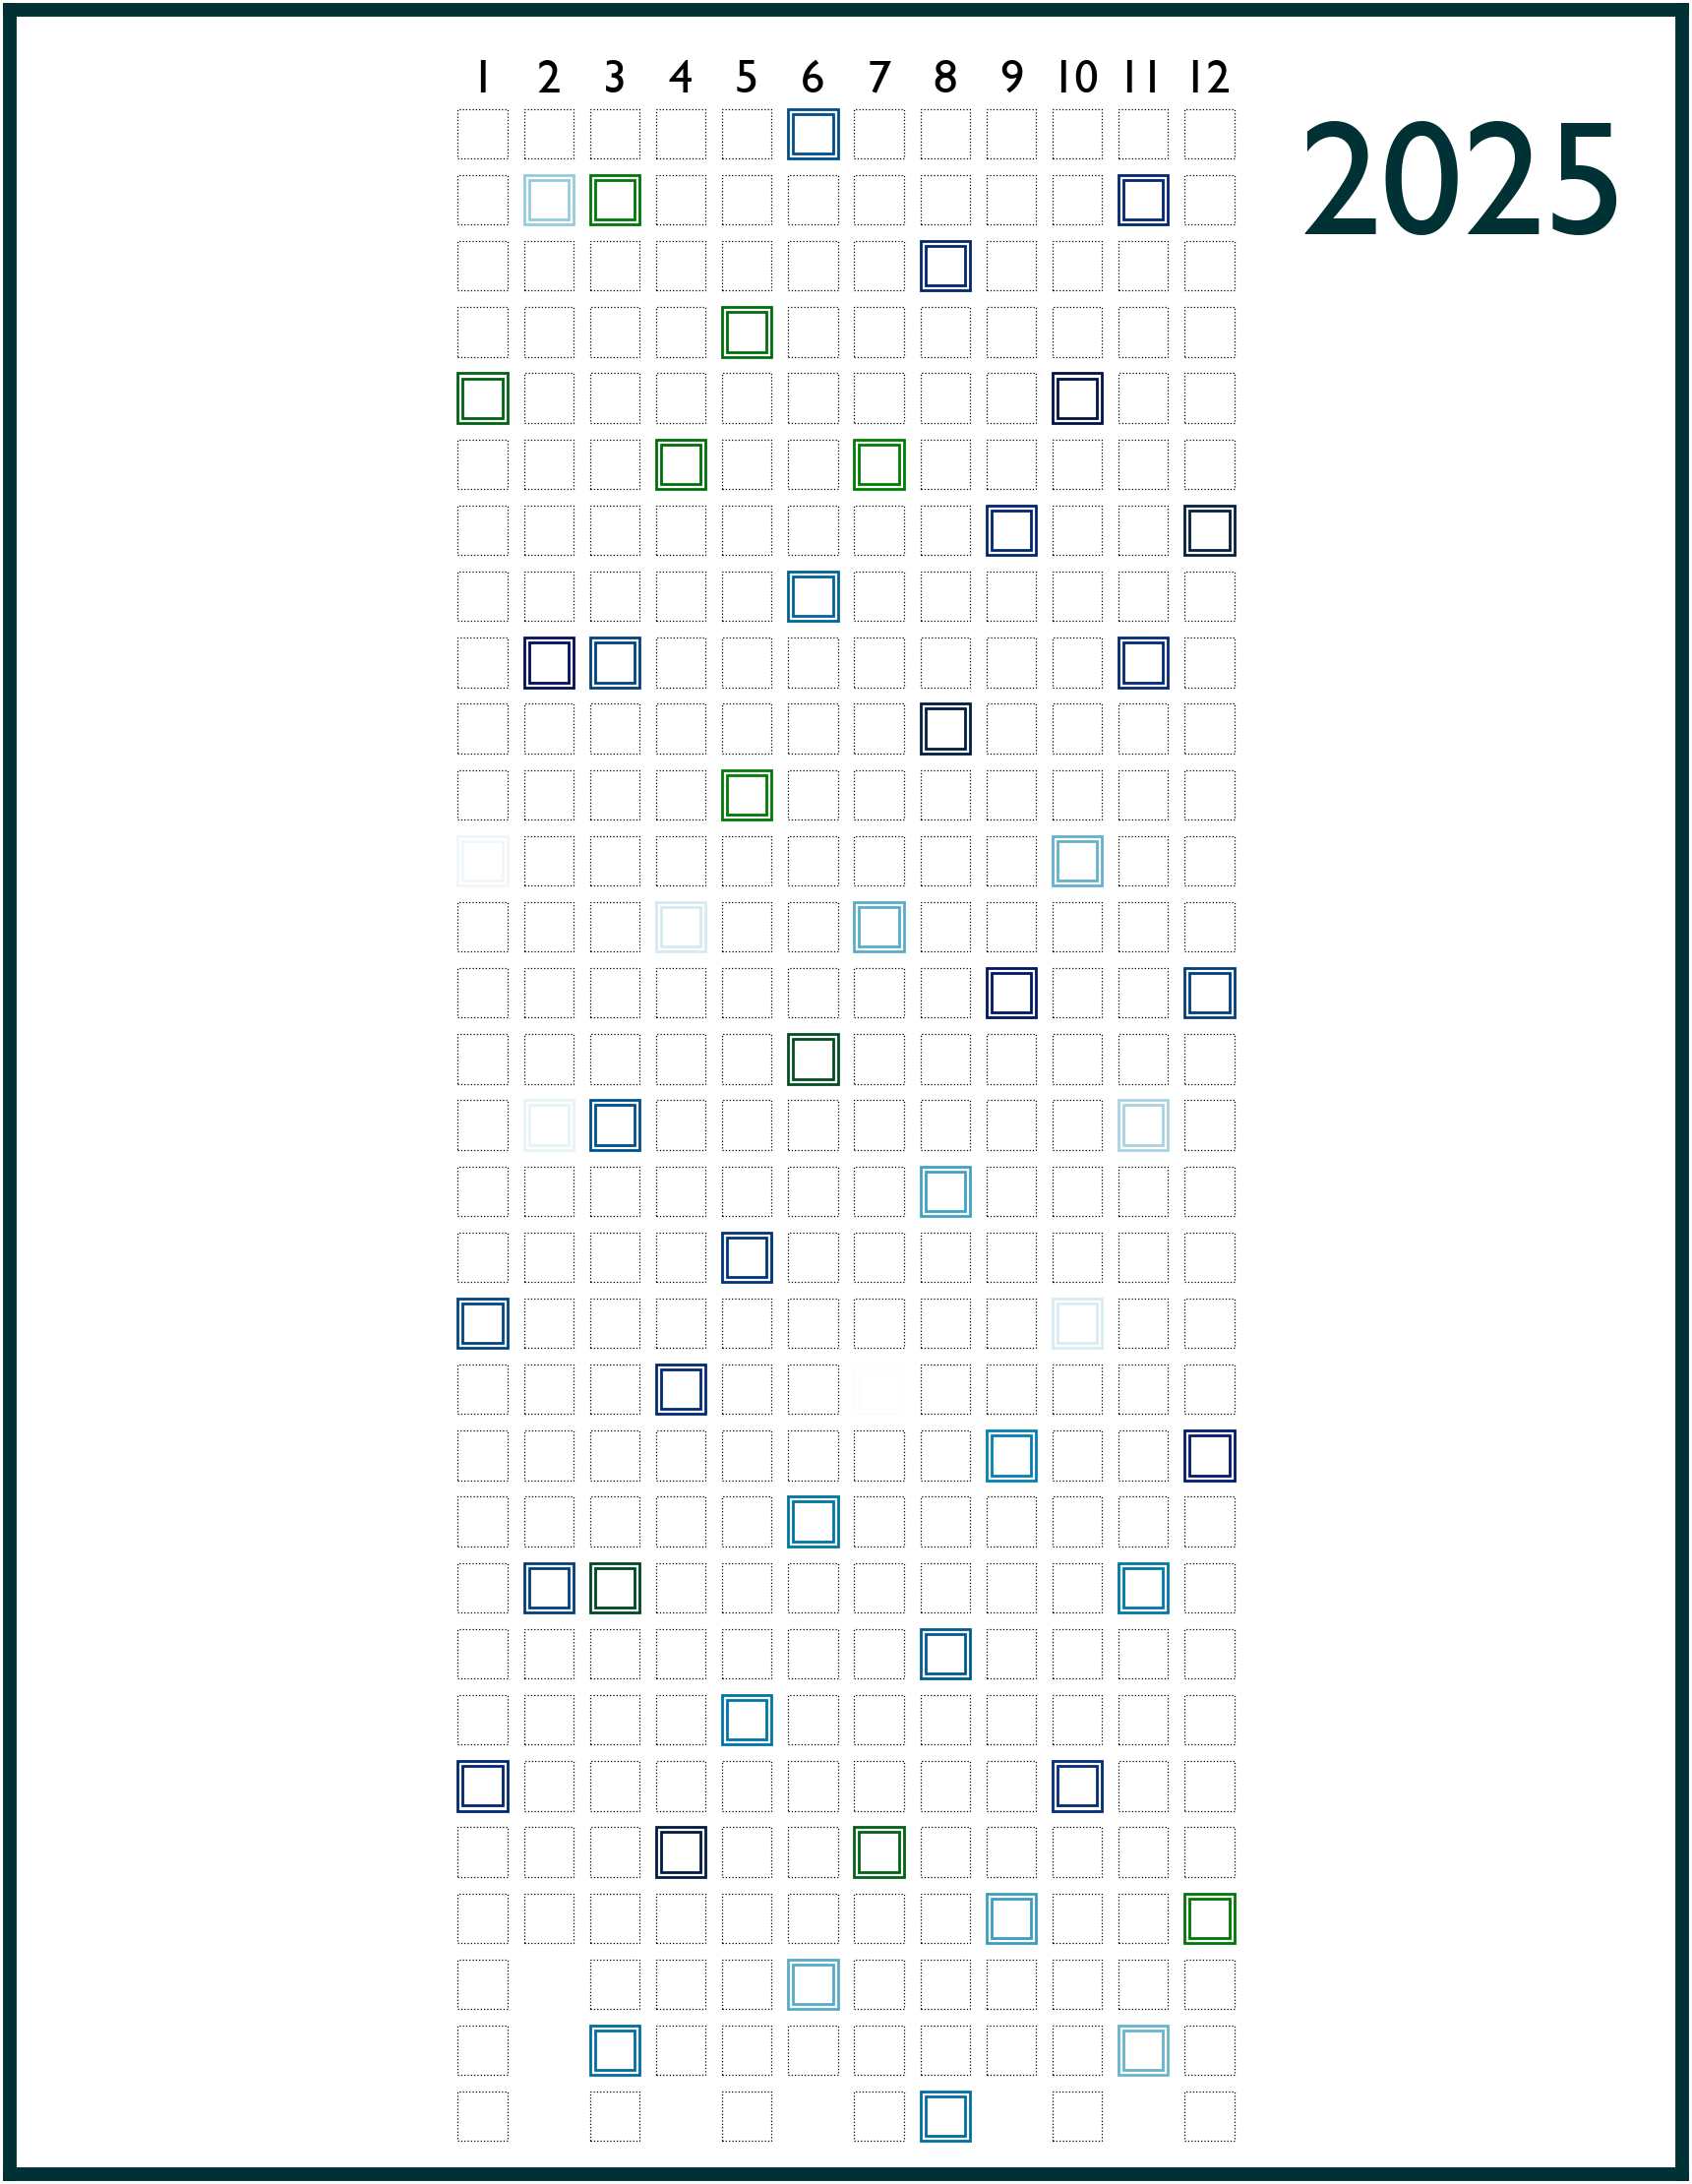

In [114]:
wallCalendar()

## implementation with 80s colourmap

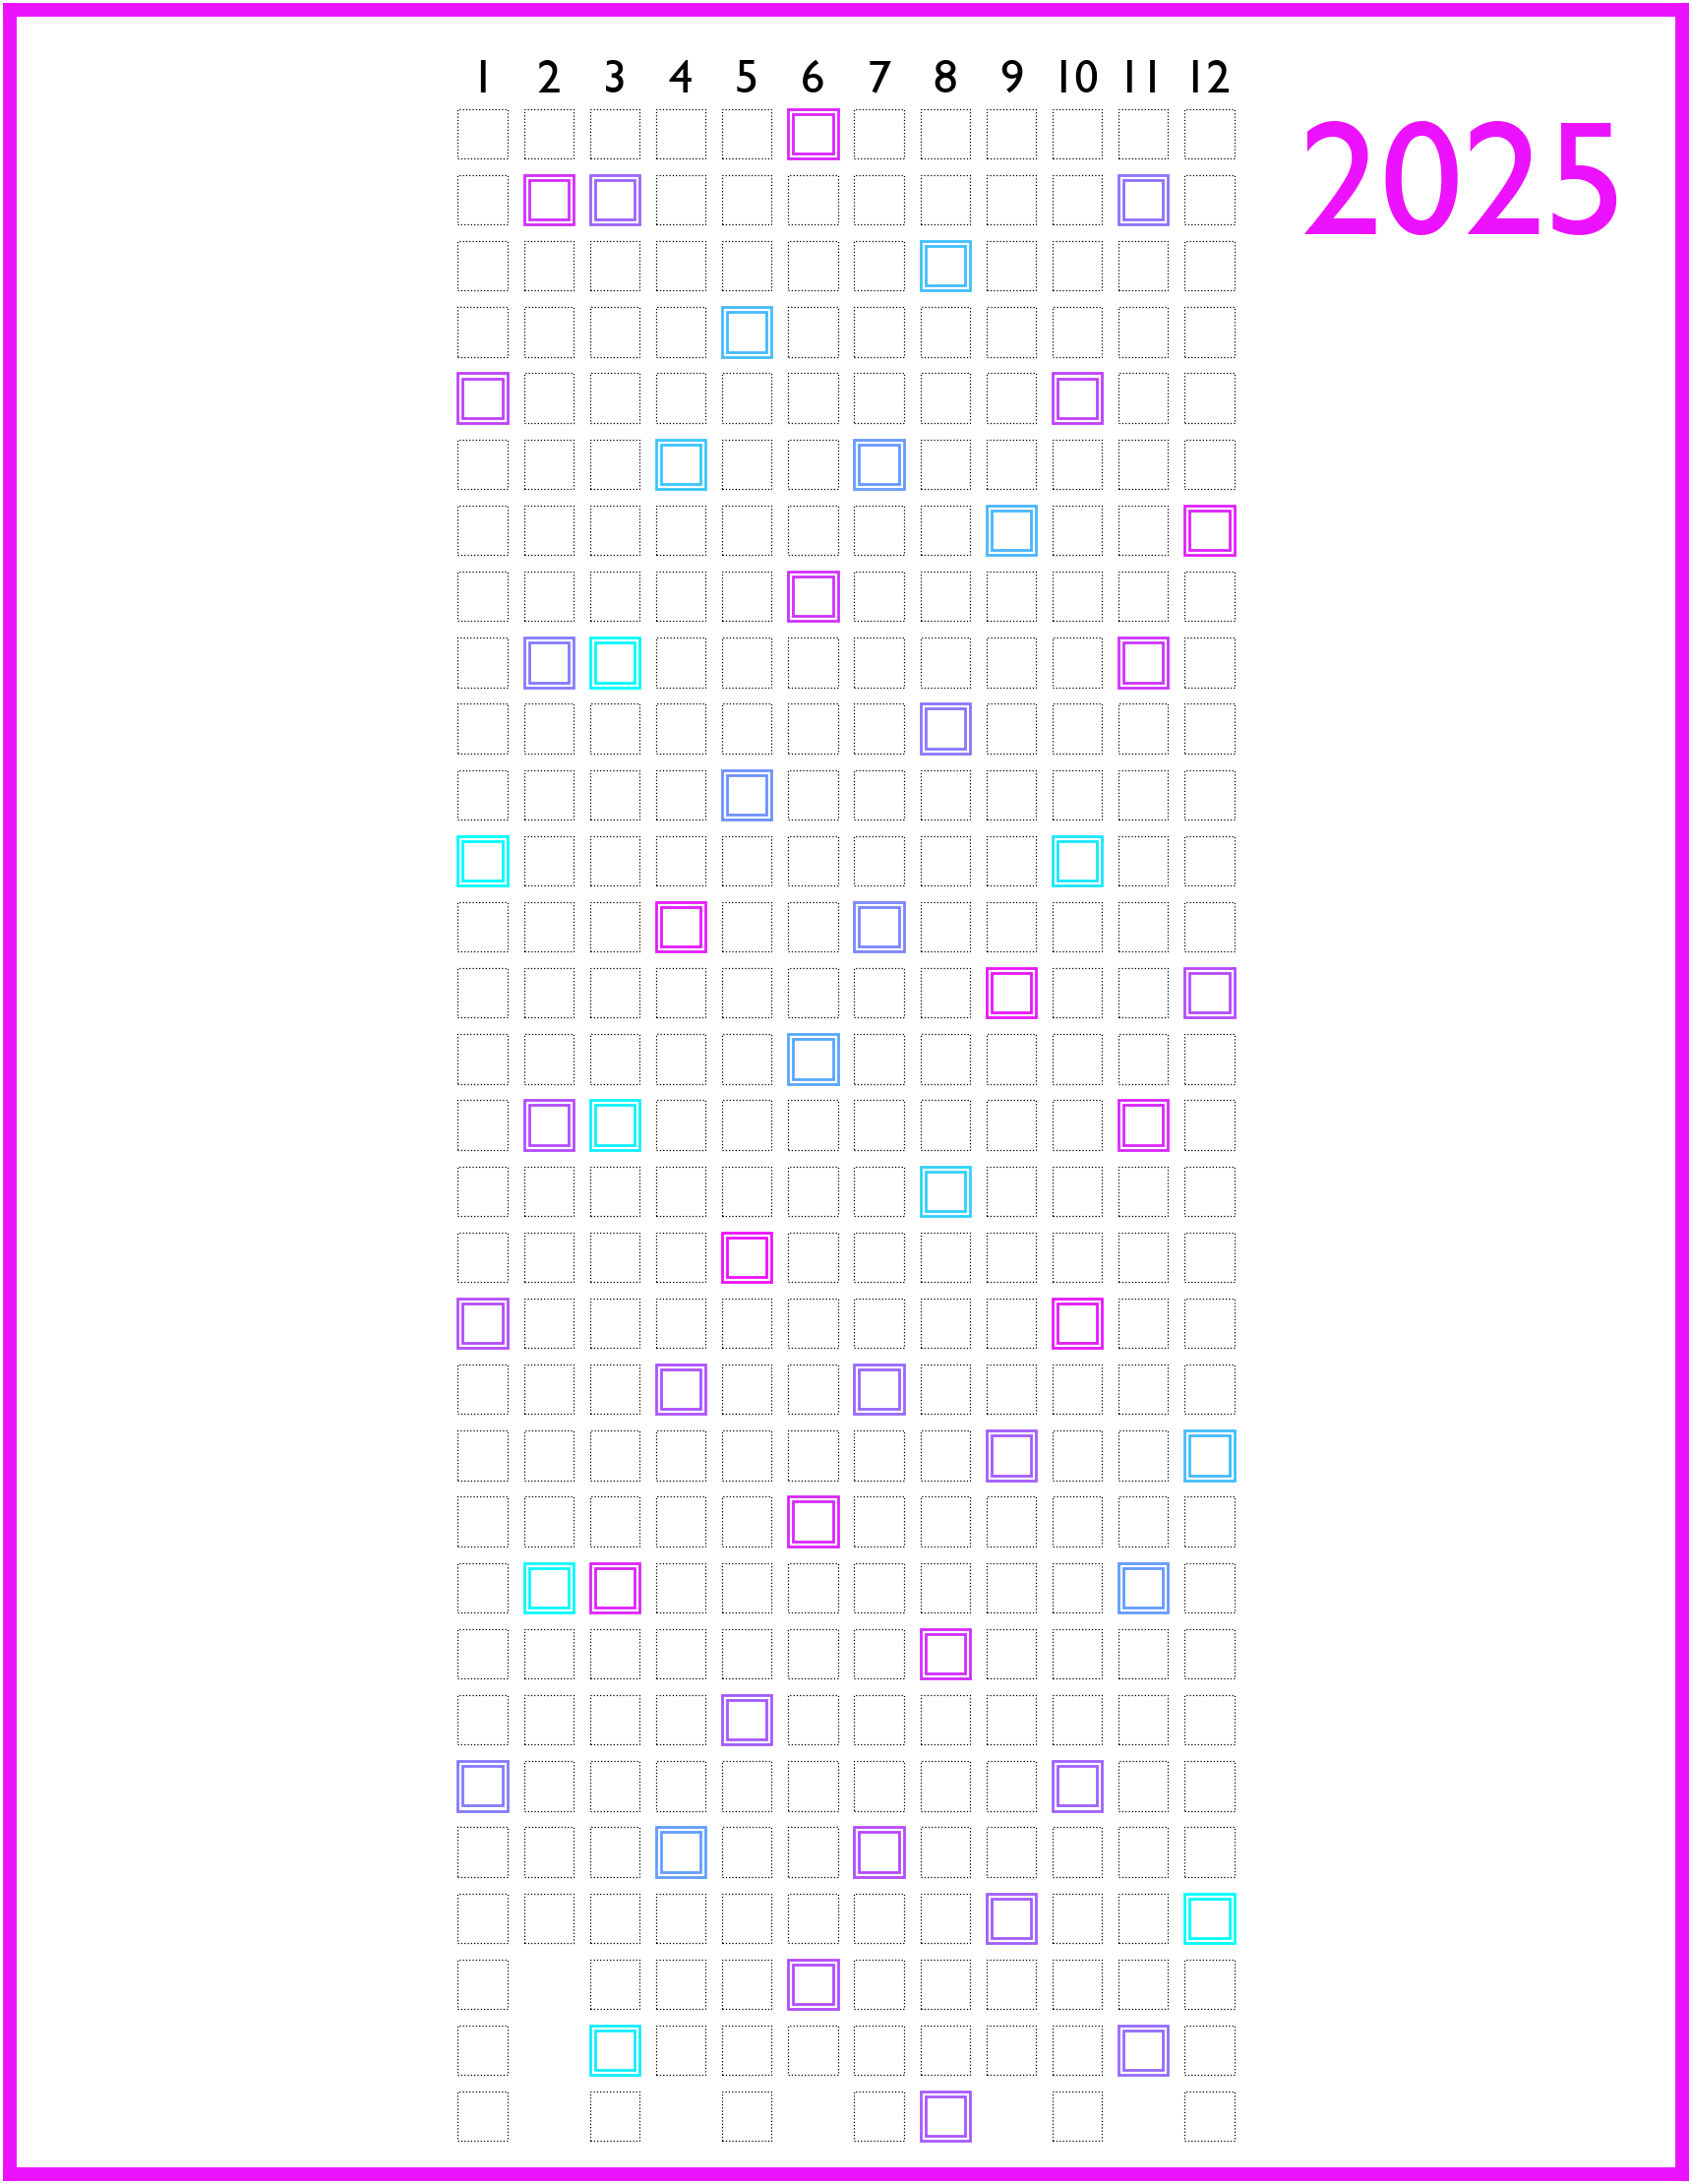

In [115]:
fname = './examples/kalendar2025-80s.jpg'
wallCalendar(fname = fname, colormap = 'cool')

## implementation with gist earth colormap

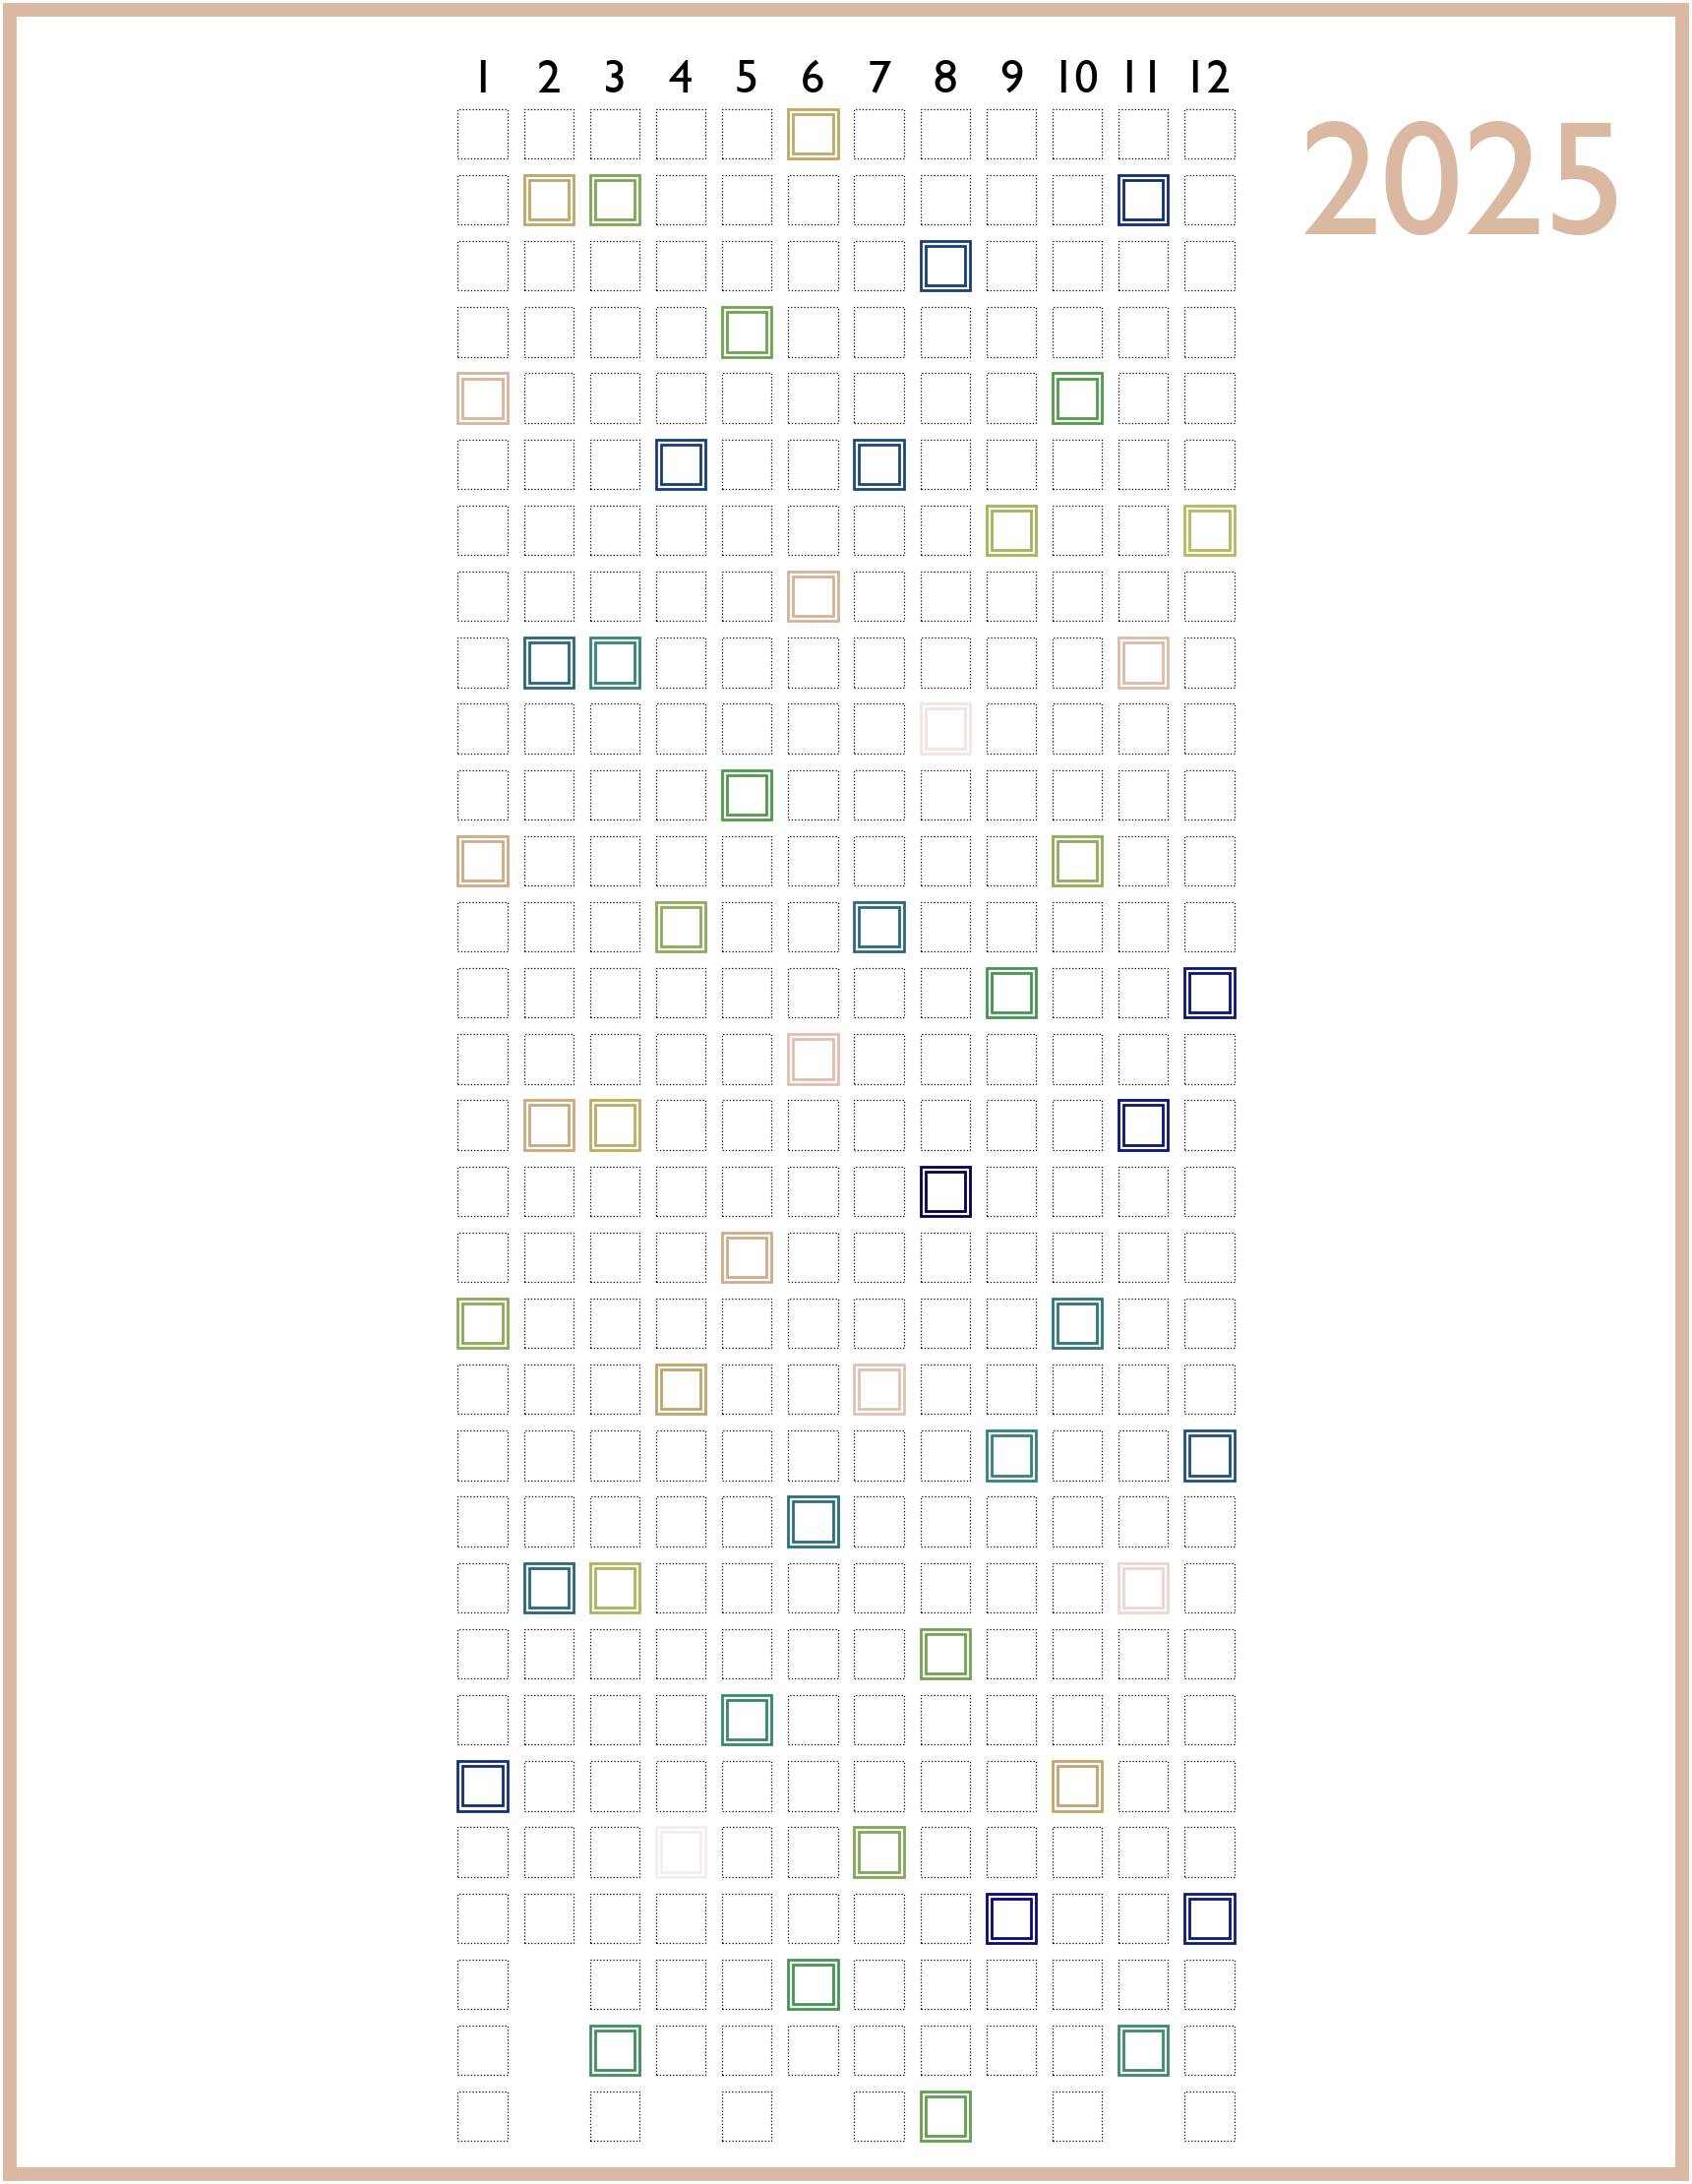

In [116]:
fname = './examples/kalendar2025-gistearth.jpg'
wallCalendar(fname = fname, colormap = 'gist_earth')

### gnuplot colormap

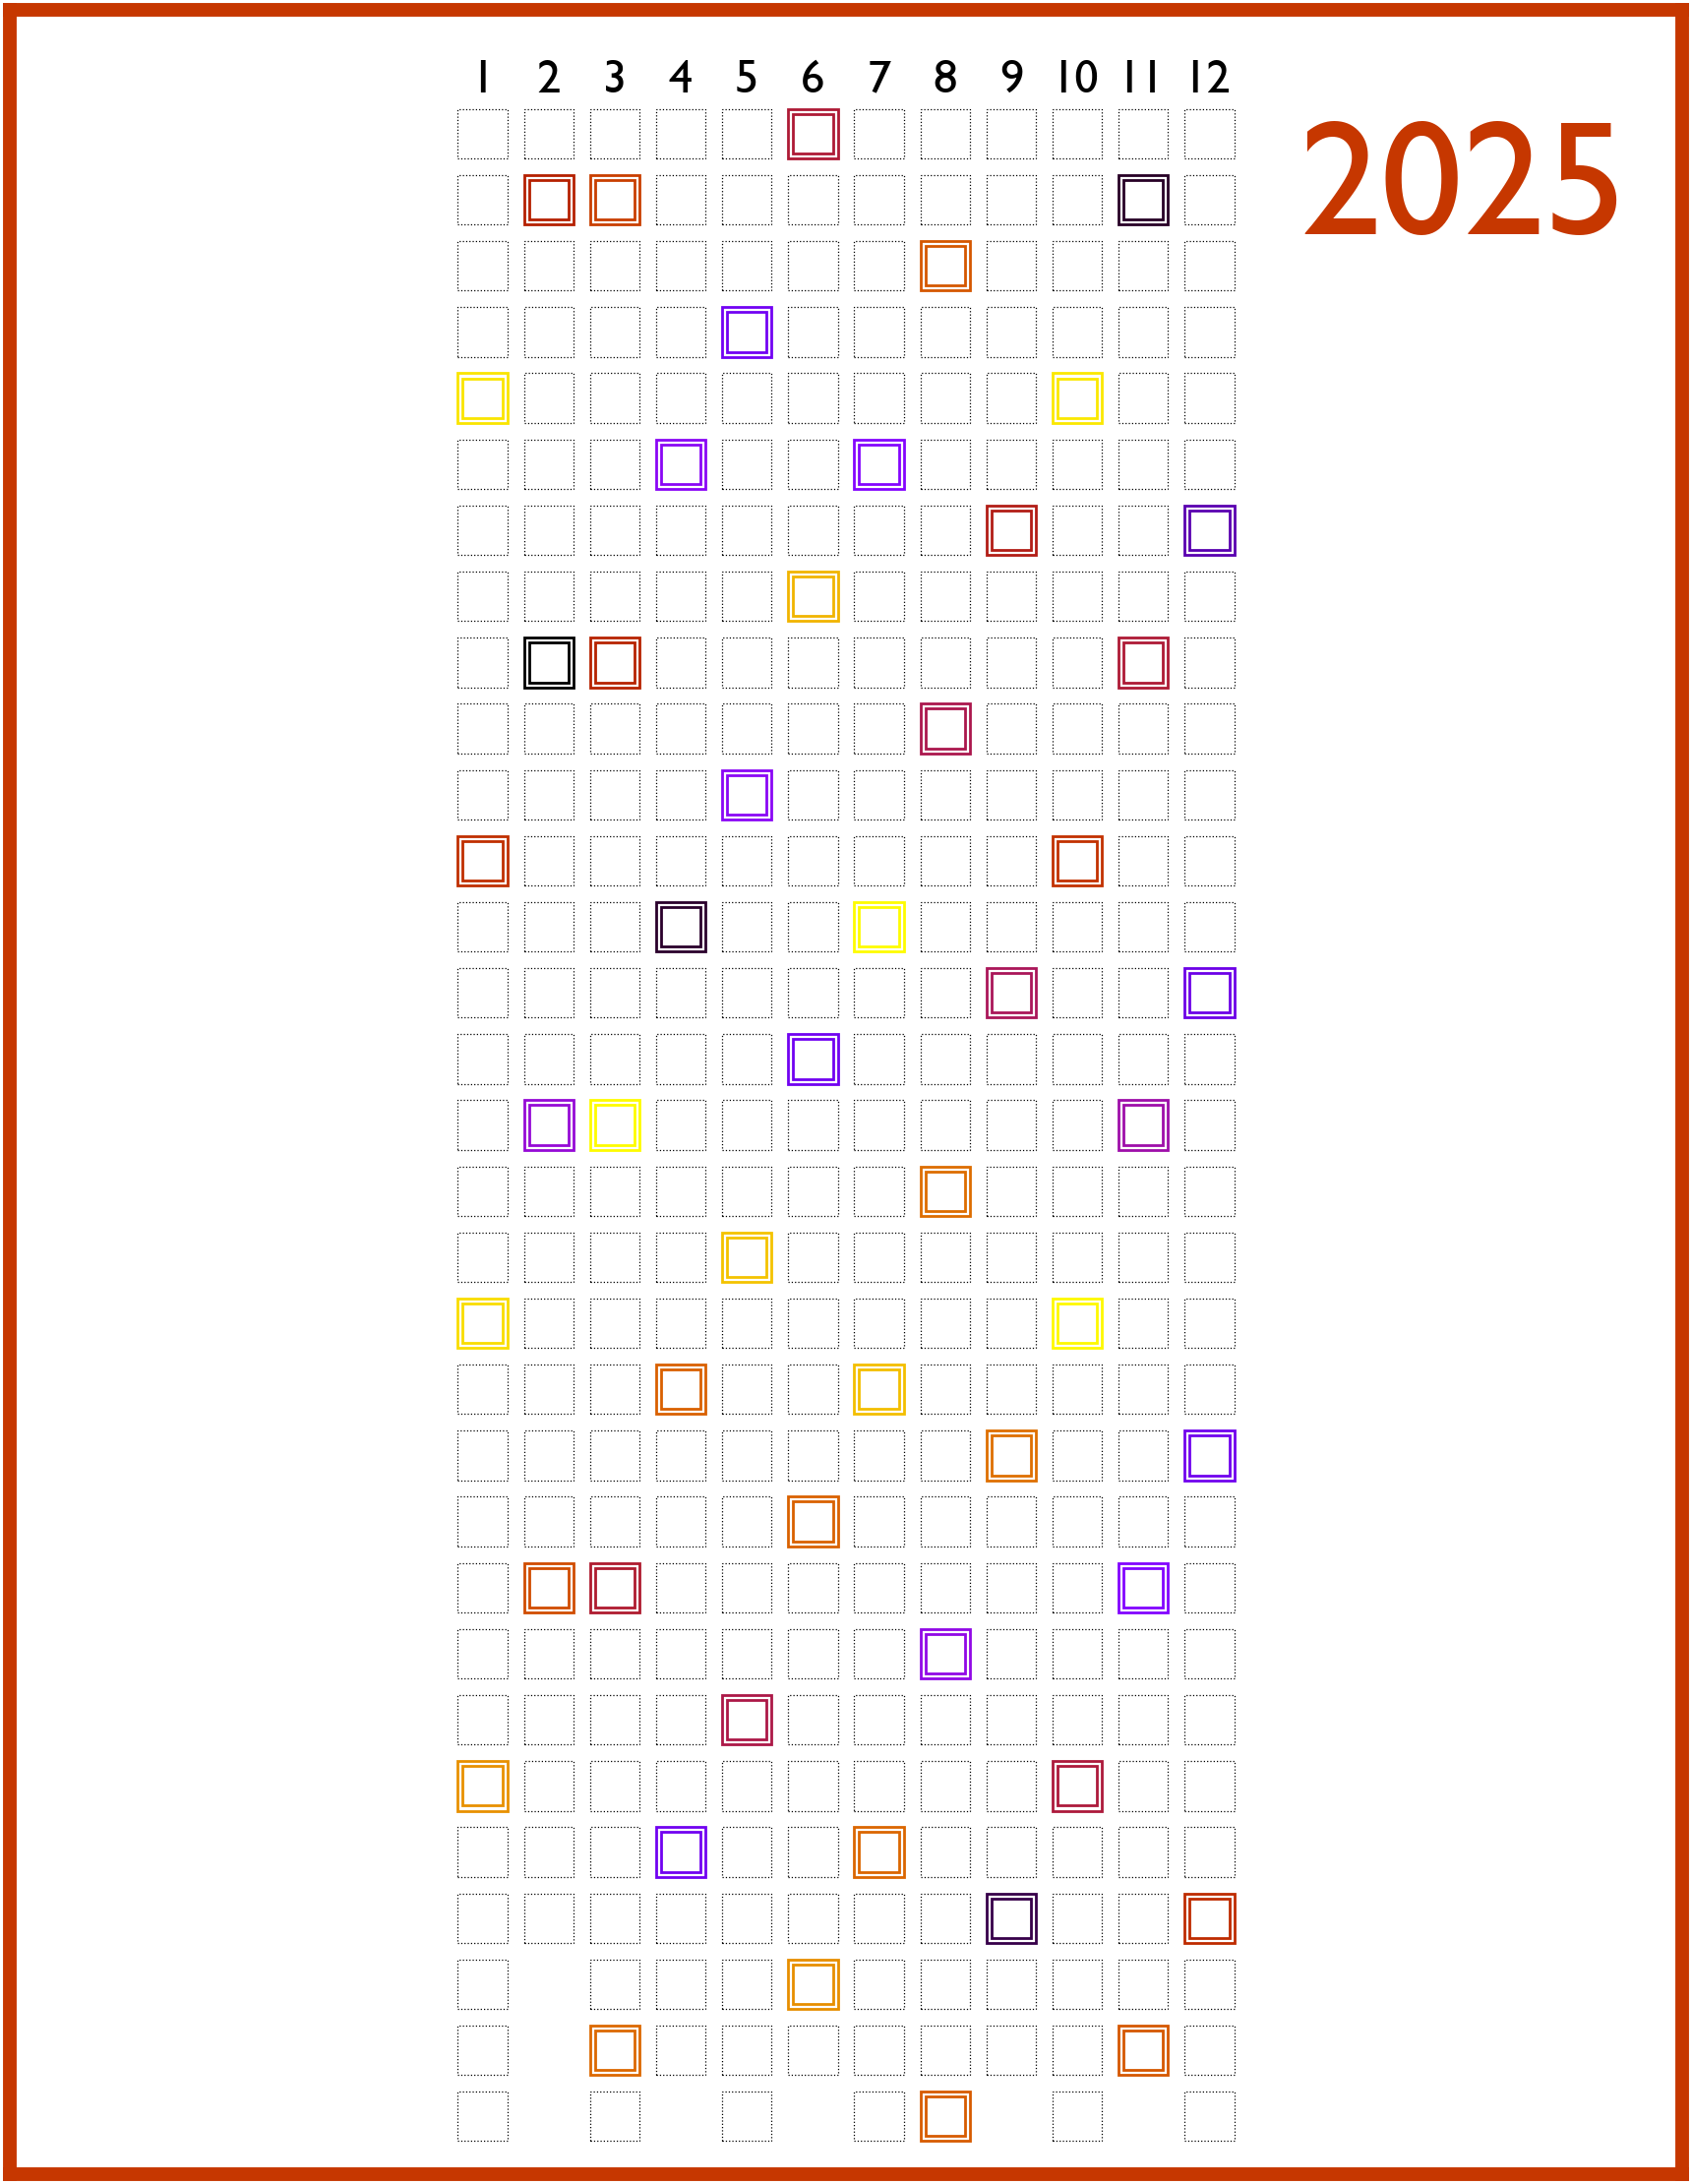

In [117]:
fname = './examples/kalendar2025-gnuplot.jpg'
wallCalendar(fname = fname, colormap = 'gnuplot')

## bicolor default (YKB)

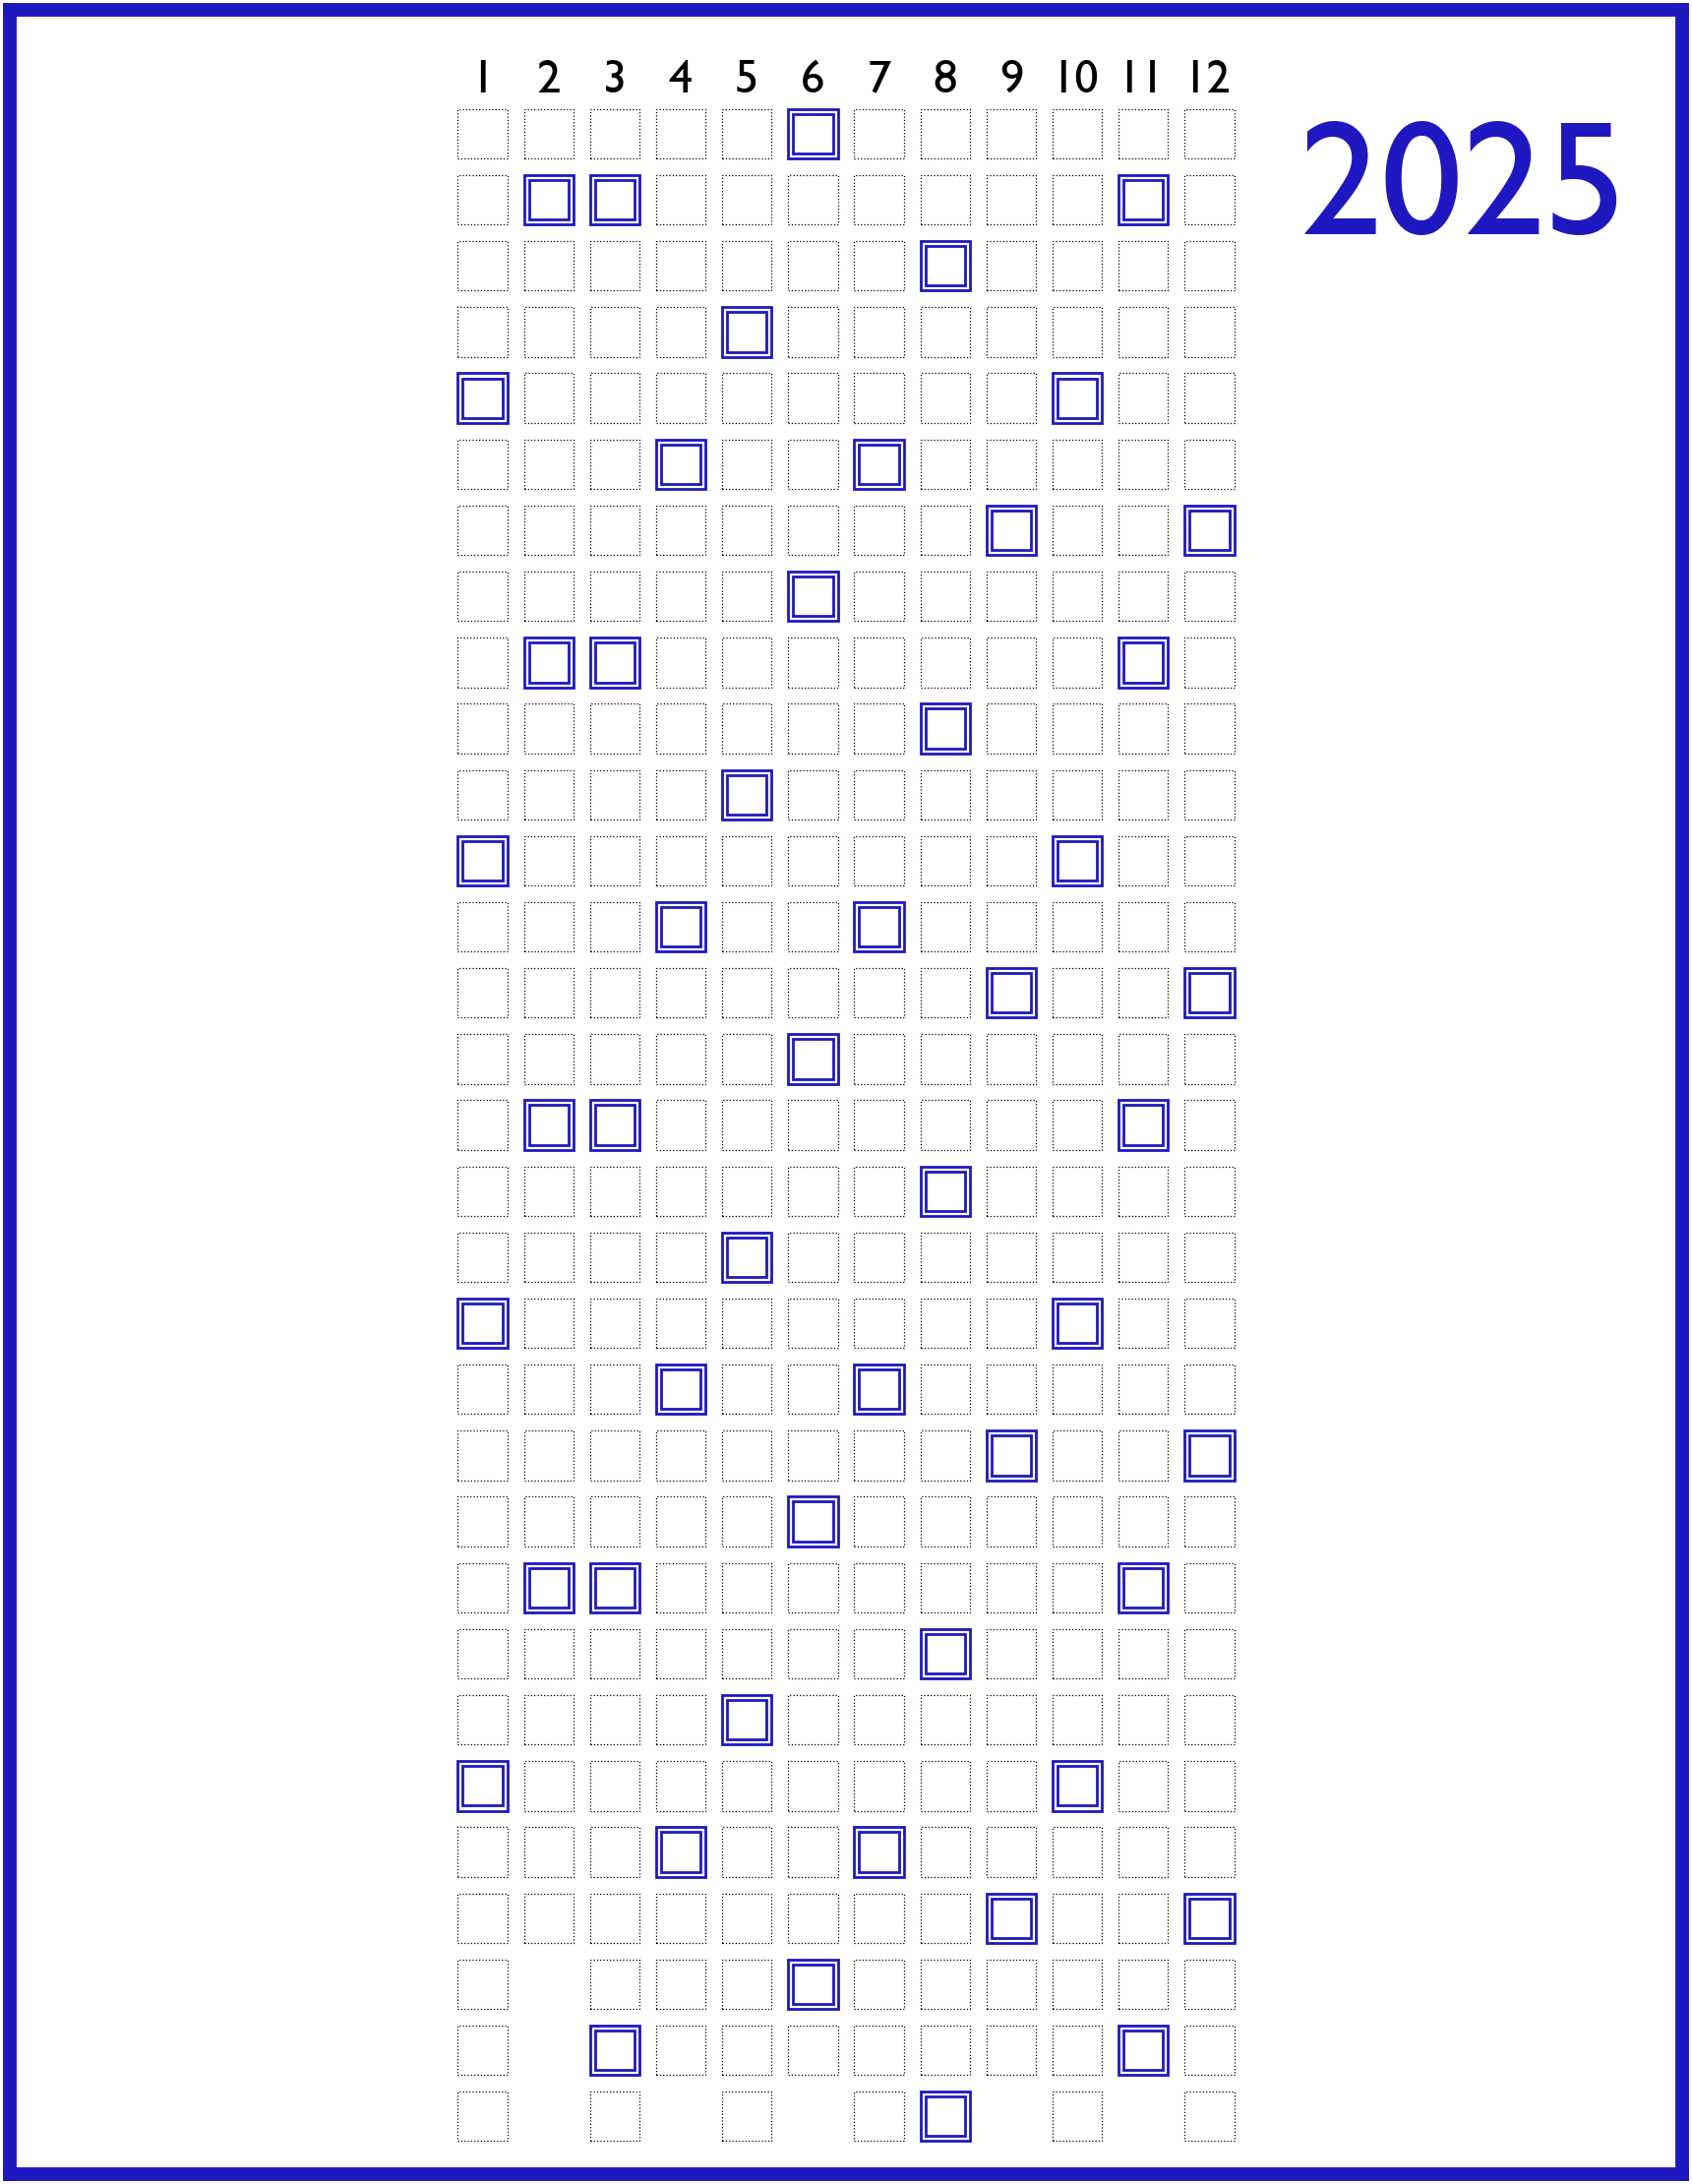

In [118]:
fname = './examples/kalendar2025-bicolor.jpg'
wallCalendar(fname = fname, bicolor = True)

## bicolor, horrible chartreuse

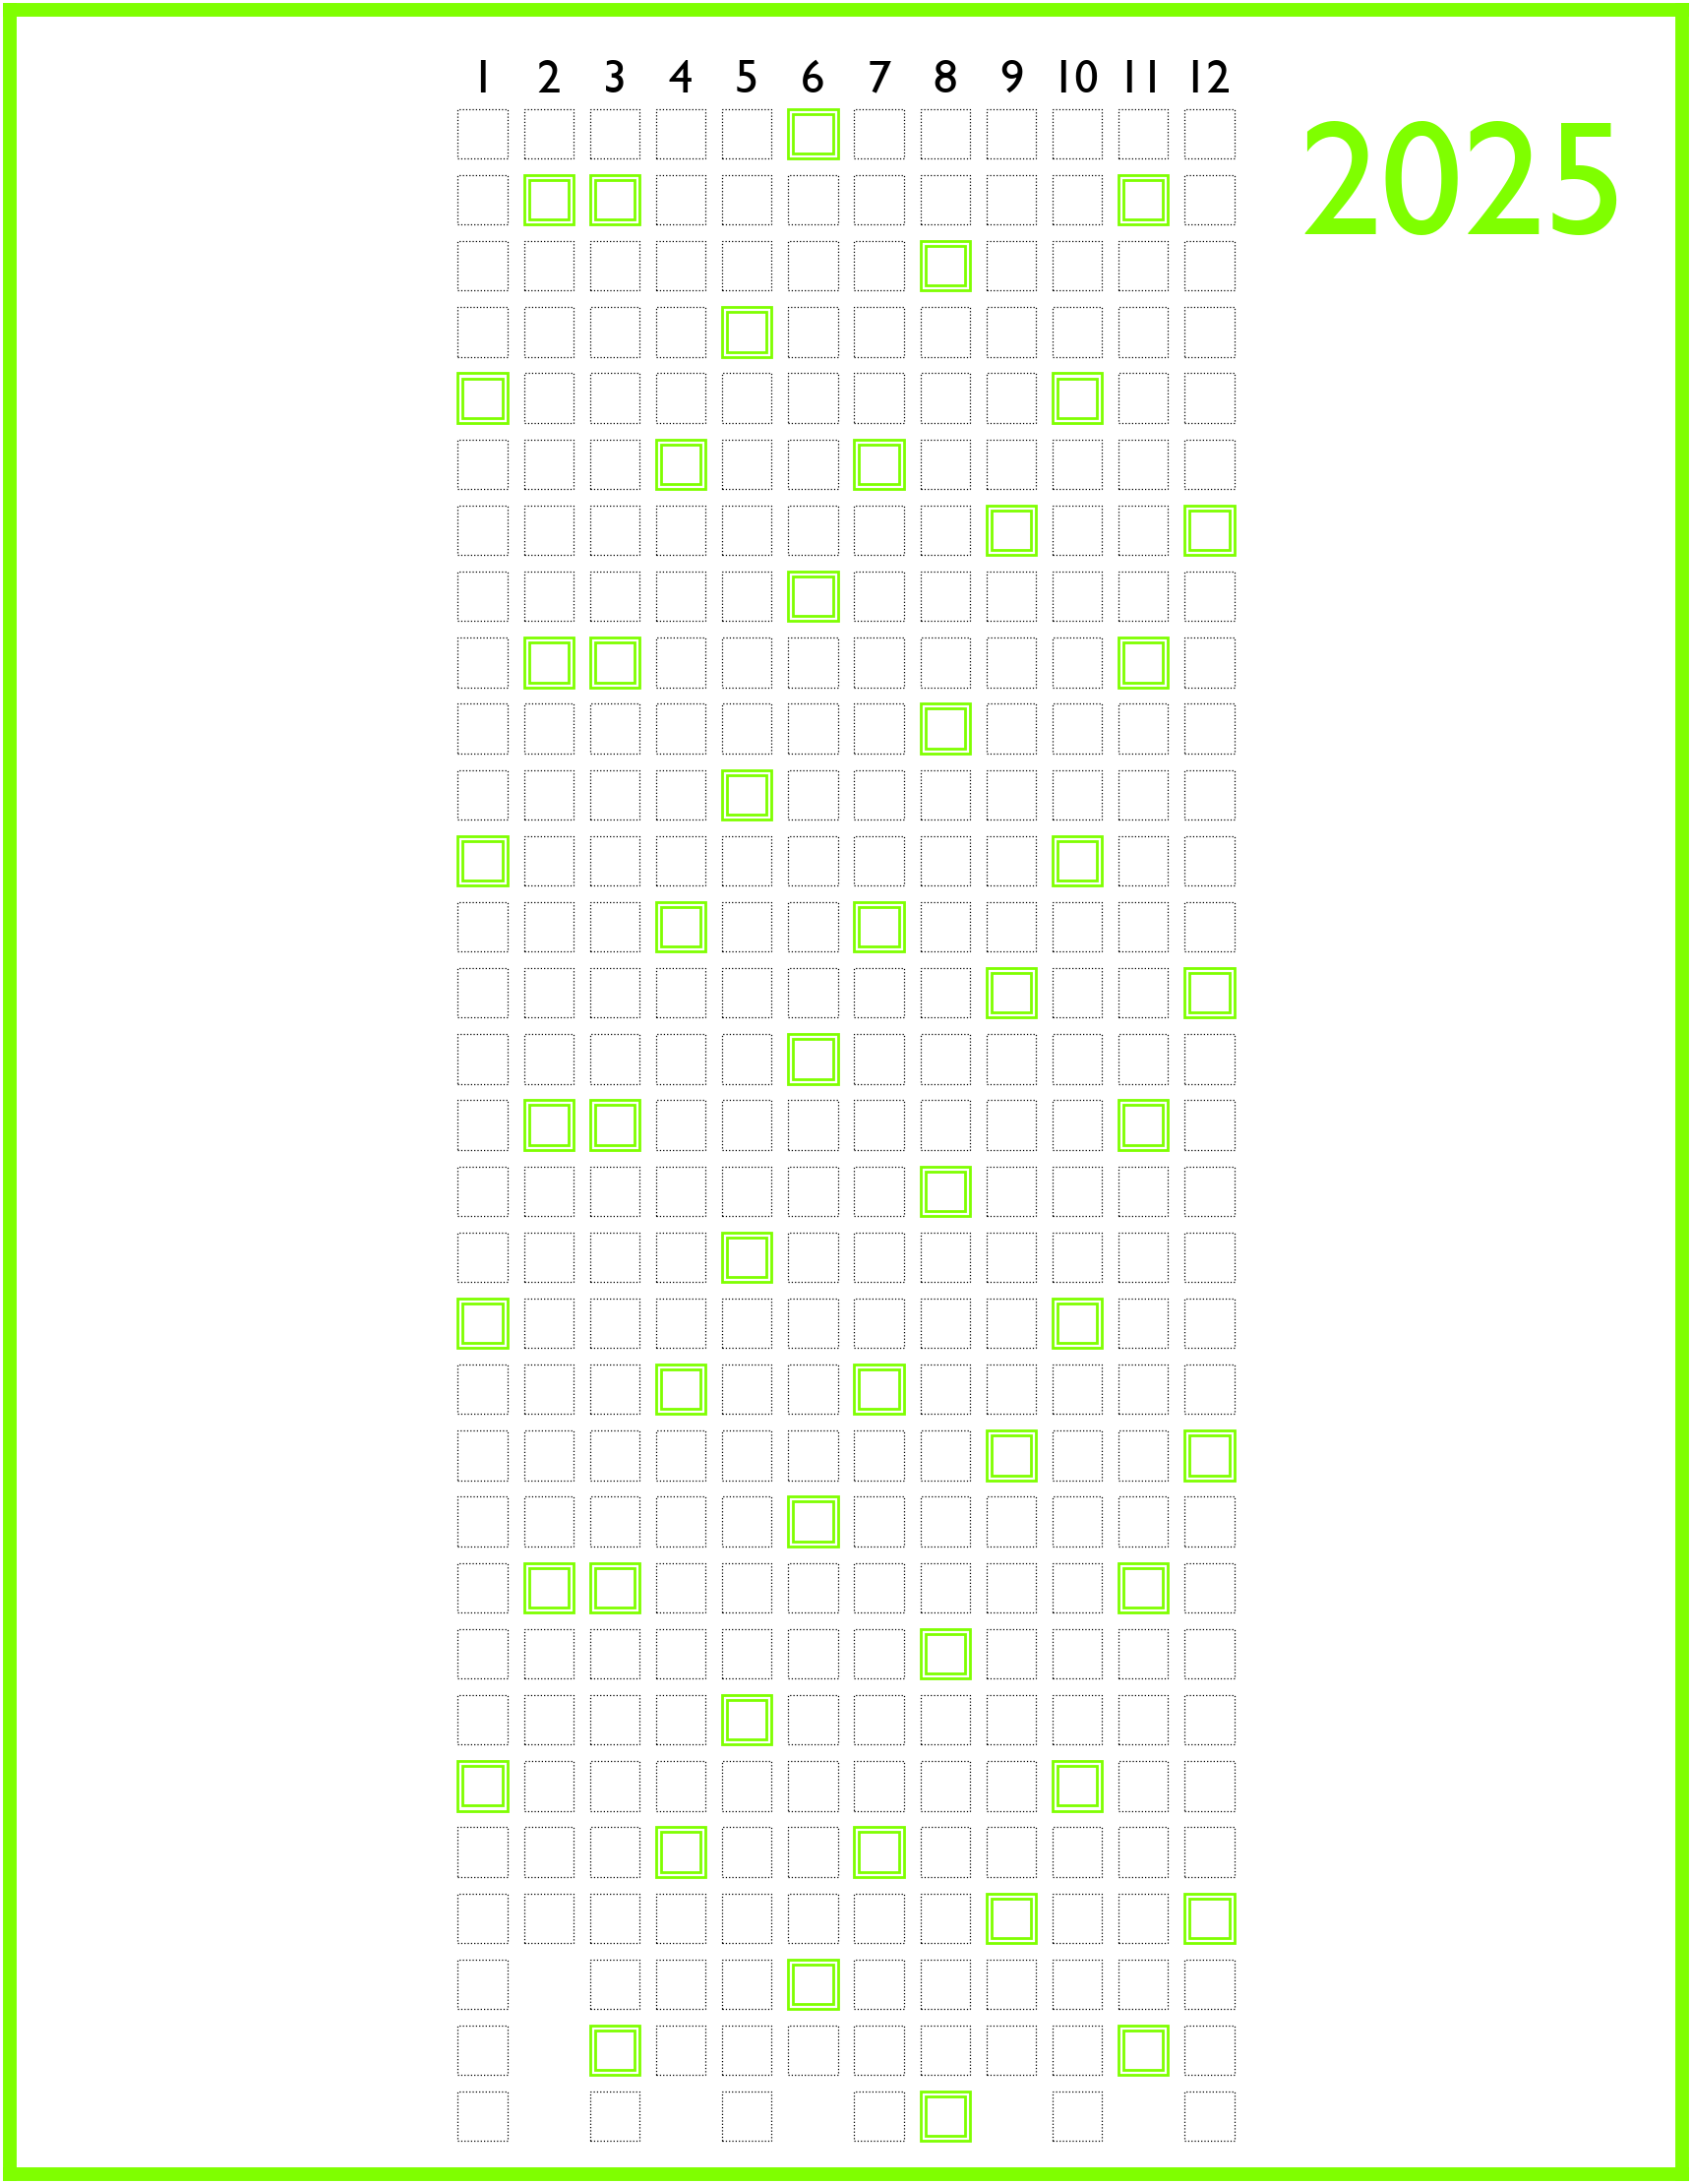

In [119]:
fname = './examples/kalendar2025-chartreuse.jpg'
wallCalendar(fname = fname, bicolor = True, hlightcolor = 'chartreuse')

### monochrome

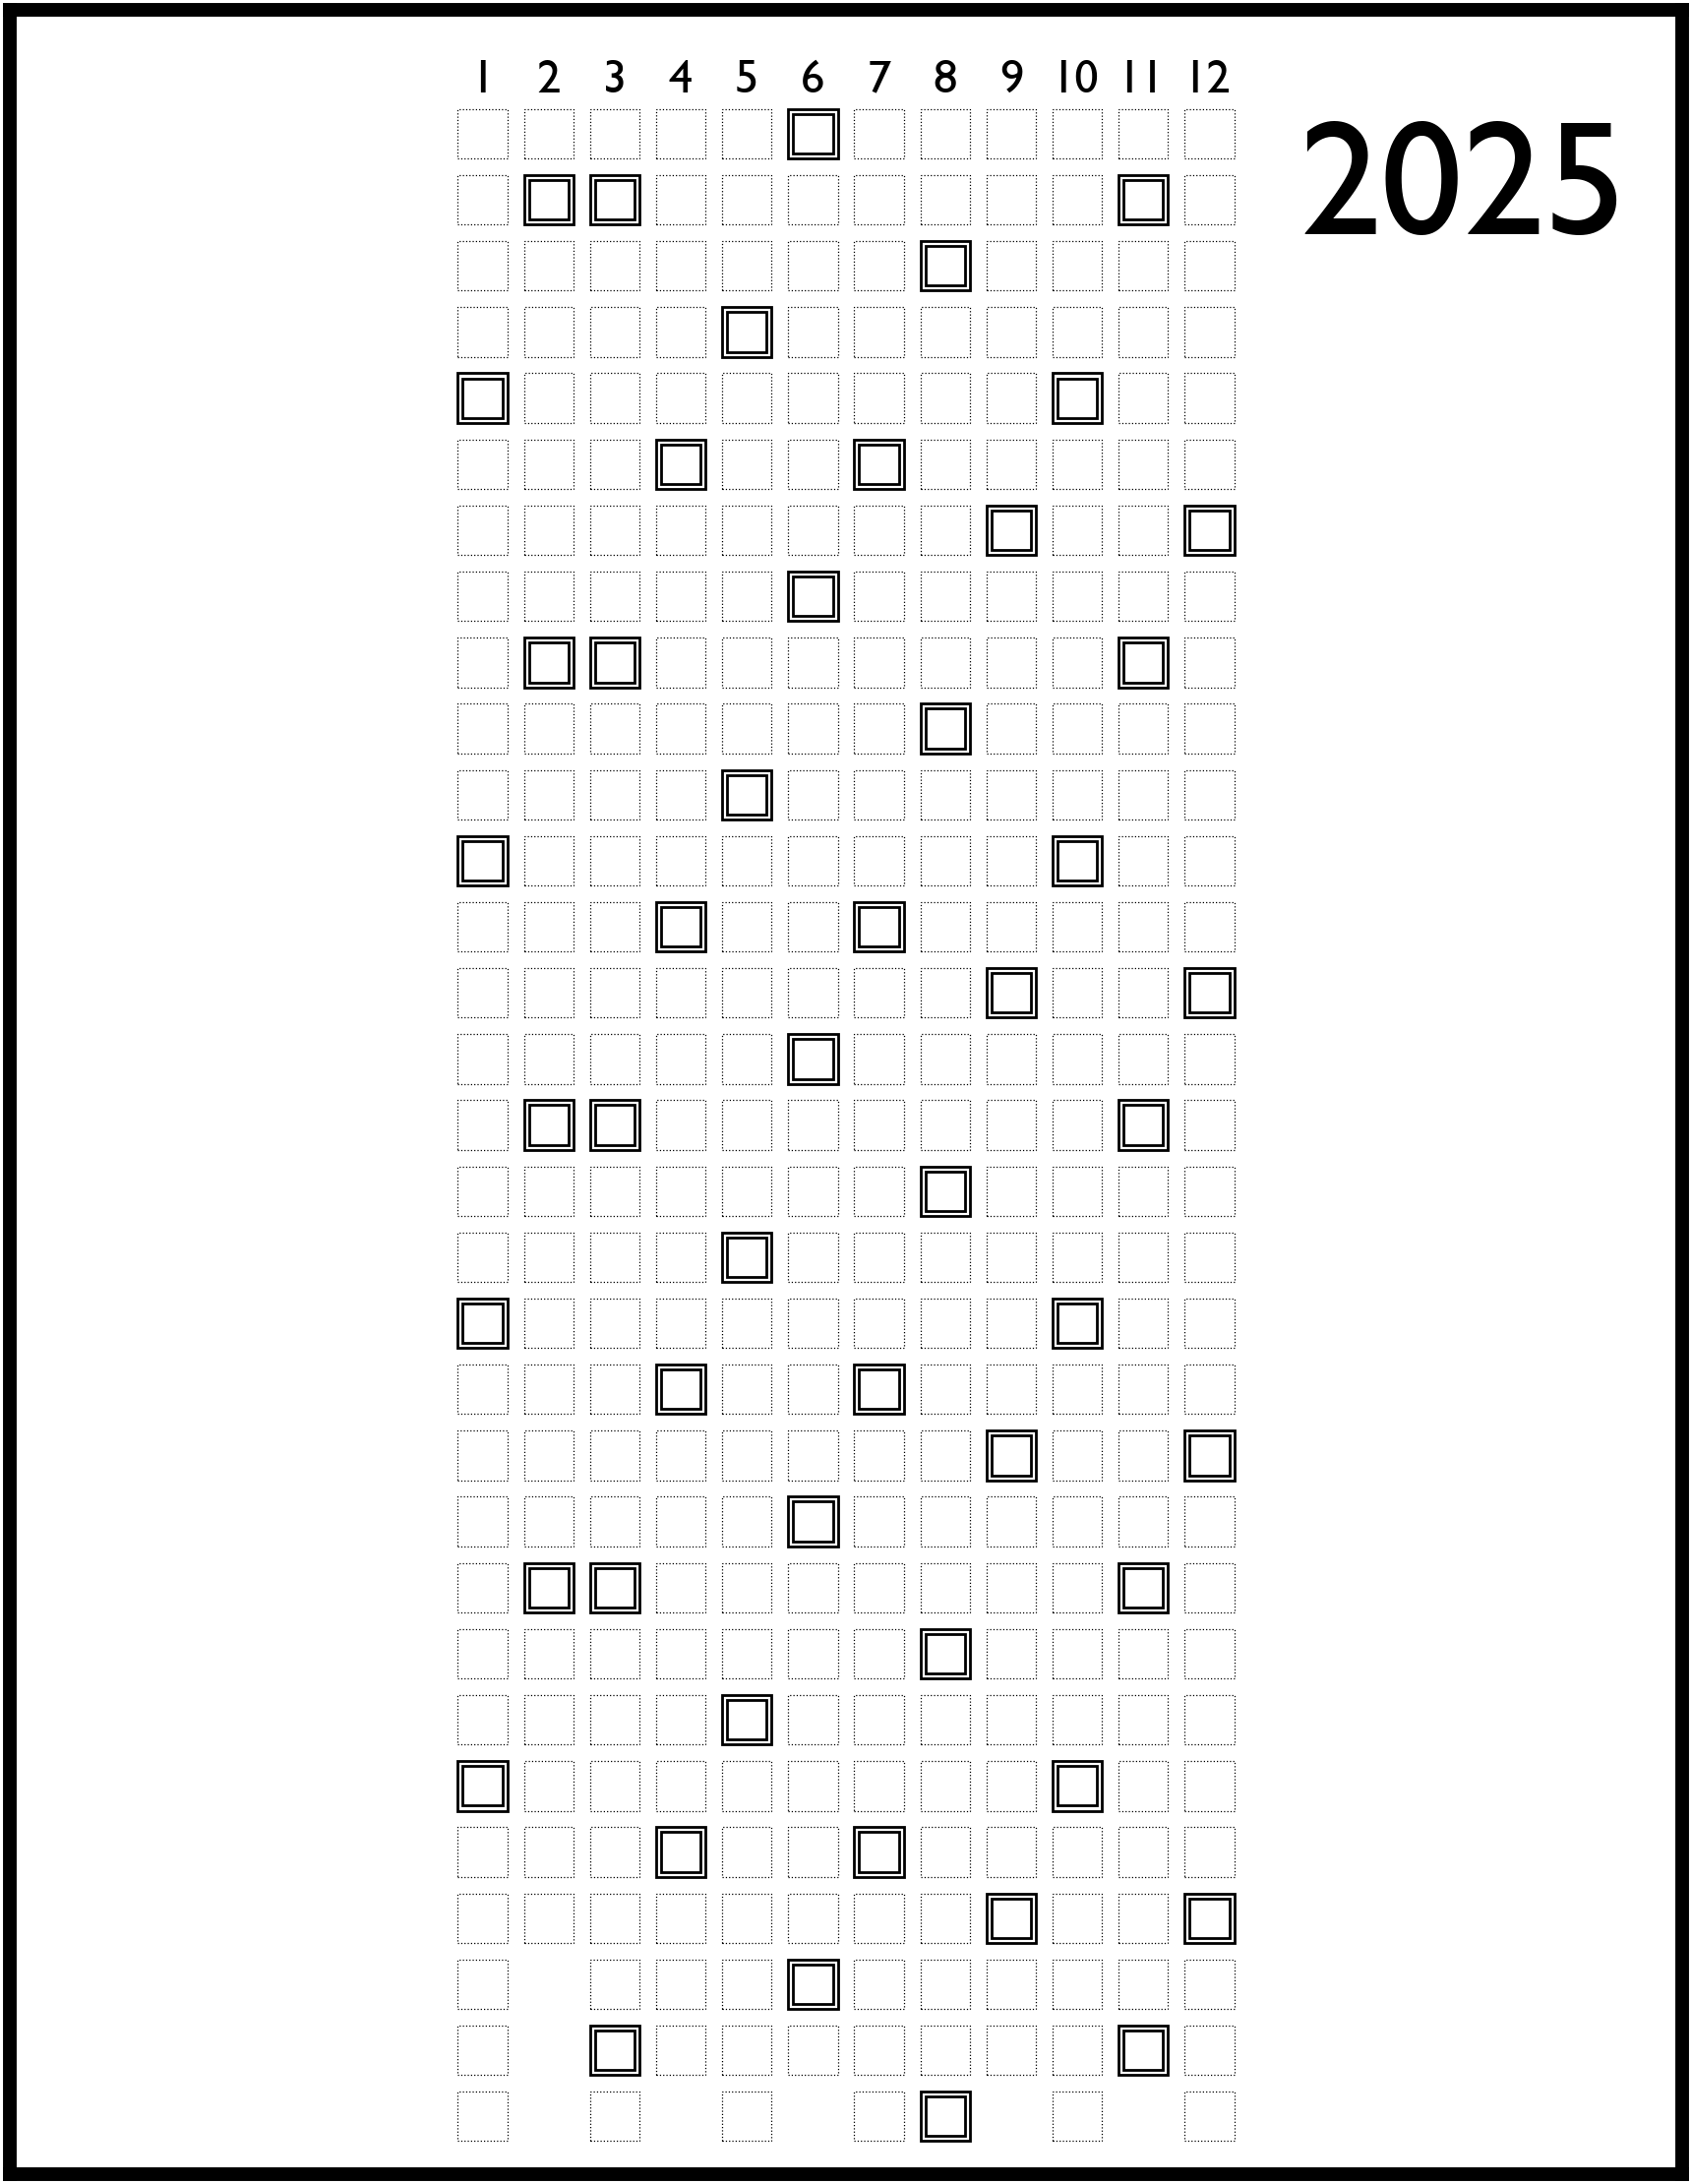

In [120]:
fname = './examples/kalendar2025-monochrome.jpg'
wallCalendar(fname = fname, monochrome = True)